<a href="https://colab.research.google.com/github/Mathavk1606/1DHD-PINN/blob/main/test/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [43]:
class SNN:
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            wts = np.random.rand(layers[i + 1], layers[i]) * np.sqrt(2 / layers[i])
            self.weights.append(wts)
            bs = np.zeros((layers[i + 1], 1))
            self.biases.append(bs)

    def tanh(self, X):
        return np.tanh(X)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def feed_forward(self, X):
        memo = [X]
        Zs = []
        for i in range(len(self.weights)):
            Z = np.dot(self.weights[i], memo[-1]) + self.biases[i]
            Zs.append(Z)
            A = self.tanh(Z)
            memo.append(A)
        return memo, Zs

    def backpropagation(self, X, y_target, learning_rate, activations, Zs):
        output = activations[-1]
        y_error = y_target - output
        mse = np.mean(y_error ** 2)

        deltas = [y_error * self.tanh_derivative(Zs[-1])]
        for i in range(len(self.weights) - 1, 0, -1):
            delta = np.dot(self.weights[i].T, deltas[-1]) * self.tanh_derivative(Zs[i - 1])
            deltas.append(delta)
        deltas.reverse()

        for i in range(len(self.weights)):
            grad_w = np.dot(deltas[i], activations[i].T) / X.shape[1]
            grad_b = np.mean(deltas[i], axis=1, keepdims=True)
            self.weights[i] += learning_rate * grad_w
            self.biases[i] += learning_rate * grad_b

        return mse

    def train(self, X, y, learning_rate=0.01, epochs=1000, batch_size=4):
        errors = []
        for epoch in range(epochs):
            total_error = 0
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i + batch_size].T
                batch_y = y[i:i + batch_size].T
                activations, Zs = self.feed_forward(batch_X)
                total_error += self.backpropagation(batch_X, batch_y, learning_rate, activations, Zs)
            avg_error = total_error / (len(X) // batch_size)
            errors.append(avg_error)
            if epoch % 100 == 0:
                print(f"Epoch {epoch + 1}, Error: {avg_error:.6f}")
        return errors

Epoch 1, Error: 0.215939
Epoch 101, Error: 0.205556
Epoch 201, Error: 0.202940
Epoch 301, Error: 0.200679
Epoch 401, Error: 0.198637
Epoch 501, Error: 0.196776
Epoch 601, Error: 0.195068
Epoch 701, Error: 0.193494
Epoch 801, Error: 0.192040
Epoch 901, Error: 0.190695


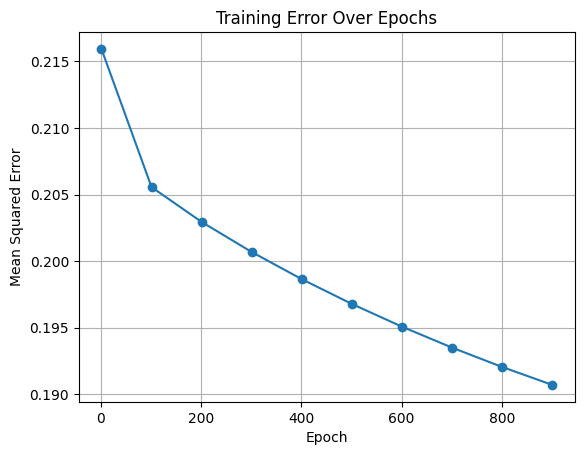

In [87]:
layers = [2, 3,3, 1]
snn = SNN(layers)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

errors = snn.train(X, y, learning_rate=0.01, epochs=1000, batch_size=2)

import matplotlib.pyplot as plt
plt.plot(range(1, 1001, 100), errors[::100], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Epochs')
plt.grid(True)
plt.show()

In [89]:
input_data = np.array([1, 1]).reshape(2, 1)
activations, Zs = snn.feed_forward(input_data)
print(f"Output: {activations[-1].flatten()[0]:.6f}")

Output: 0.709981
